In [26]:
#install packages

#!pip install pandas numpy matplotlib scikit-learn

In [27]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from collections import defaultdict
from matplotlib.colors import LinearSegmentedColormap
from sklearn.tree import plot_tree

In [28]:
# upload & save data

census_referrals = pd.read_excel('/Users/darcelypena/Downloads/Juvenile_Justice_Internship/final_project/referrals_census_dummy.xlsx')
census_referrals

,location,year,Totalhouseholds,Elementaryschoolgrades18,Highschoolgrades912,Averagehouseholdsize,Averagefamilysize,Unemployed,Civilianlaborforce,Medianhouseholdincomedollars,...,BlackorAfricanAmerican,Asian,HispanicorLatinoofanyrace,Maletotalpop_%,Femaletotalpop_%,White_%,BlackorAfricanAmerican_%,Asian_%,HispanicorLatinoofanyrace_%,referral_count
0,"Cumberland County, Pennsylvania",1892.57,101153.41,22149.89,11557.49,2.47,2.73,8084.64,114977.11,57773.33,...,7392.67,6022.45,6249.08,52.46,54.75,87.63,2.95,2.82,2.60,8.63
1,Census Tract 119.01,2141.37,2064.21,555.83,293.72,2.64,2.85,110.99,3022.72,69034.22,...,0.00,157.63,223.86,51.91,48.64,97.94,0.00,2.64,4.16,1.08
2,Census Tract 120,2186.94,1874.78,539.25,203.35,2.30,2.93,197.71,2794.42,47829.29,...,478.40,274.10,285.47,45.72,53.29,83.22,9.56,5.74,5.06,3.21
3,Census Tract 127.01,2083.24,1943.25,510.11,169.47,2.51,2.77,154.38,2653.11,70587.28,...,7.50,58.78,36.19,45.95,55.49,101.21,0.14,1.12,0.69,1.09
4,Census Tract 132,1861.18,1863.60,331.74,130.29,2.19,3.09,390.07,2375.36,31045.68,...,64.00,60.70,192.73,58.63,43.67,87.81,1.44,1.47,4.30,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Census Tract 126,2162.88,2039.21,610.34,228.31,2.74,3.33,71.12,3004.52,59954.46,...,206.58,13.58,306.83,50.64,50.00,98.14,4.01,0.24,4.65,1.04
136,Census Tract 129,2175.42,539.63,76.24,99.80,2.62,2.98,17.42,723.82,41881.25,...,10.76,2.77,45.73,51.90,46.26,90.42,0.98,0.26,3.47,1.06
137,Census Tract 130,1905.46,2719.29,619.32,325.02,2.45,3.02,122.22,3380.75,67121.98,...,44.27,16.35,192.26,54.23,46.87,91.93,0.59,0.23,2.97,4.32
138,Census Tract 131.05,2190.73,2352.66,888.69,335.91,2.68,2.92,182.69,3156.67,82404.62,...,254.72,29.26,0.00,52.58,41.04,93.20,4.25,0.52,0.00,0.92


In [29]:
# print columns
census_referrals.columns

Index(['location', 'year', 'Totalhouseholds', 'Elementaryschoolgrades18',
       'Highschoolgrades912', 'Averagehouseholdsize', 'Averagefamilysize',
       'Unemployed', 'Civilianlaborforce', 'Medianhouseholdincomedollars',
       'Meanhouseholdincomedollars', 'Unemployment Rate', 'Totalpopulation',
       'Maletotalpop', 'Femaletotalpop', 'White', 'BlackorAfricanAmerican',
       'Asian', 'HispanicorLatinoofanyrace', 'Maletotalpop_%',
       'Femaletotalpop_%', 'White_%', 'BlackorAfricanAmerican_%', 'Asian_%',
       'HispanicorLatinoofanyrace_%', 'referral_count'],
      dtype='object')

In [30]:
# Define features and target
feature_cols = [
    'year','Elementaryschoolgrades18',
    'Highschoolgrades912', 'Averagehouseholdsize', 'Averagefamilysize',
    'Unemployed', 'Medianhouseholdincomedollars',
    'Meanhouseholdincomedollars', 'Unemployment Rate', 'Totalpopulation', 'Maletotalpop', 'Femaletotalpop', 'White', 'BlackorAfricanAmerican',
    'Asian', 'HispanicorLatinoofanyrace', 'Maletotalpop_%','Femaletotalpop_%', 'White_%', 'BlackorAfricanAmerican_%', 'Asian_%',
    'HispanicorLatinoofanyrace_%'
]

target_col = 'referral_count'

# Drop rows with missing values in relevant columns
model_df = census_referrals.dropna(subset=feature_cols + [target_col])

# Set up features (X) and target (y)
X = model_df[feature_cols]
y = model_df[target_col]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 1.94
R² Score: 0.92


In [31]:
# Store depths where each feature is used
feature_depths = defaultdict(list)

# Recursive function to traverse the tree
def collect_feature_depths(tree, node_id=0, current_depth=0):
    feature_index = tree.feature[node_id]
    if feature_index != -2:  # -2 indicates a leaf node
        feature_name = feature_cols[feature_index]
        feature_depths[feature_name].append(current_depth)
        # Recurse into children
        collect_feature_depths(tree, tree.children_left[node_id], current_depth + 1)
        collect_feature_depths(tree, tree.children_right[node_id], current_depth + 1)

# Iterate over all trees in the forest
for estimator in rf.estimators_:
    tree = estimator.tree_
    collect_feature_depths(tree)

# Calculate average depth per feature
avg_depths = {feature: np.mean(depths) for feature, depths in feature_depths.items()}
avg_depth_df = pd.DataFrame.from_dict(avg_depths, orient='index', columns=['Average Depth'])
avg_depth_df = avg_depth_df.sort_values(by='Average Depth', ascending=True)

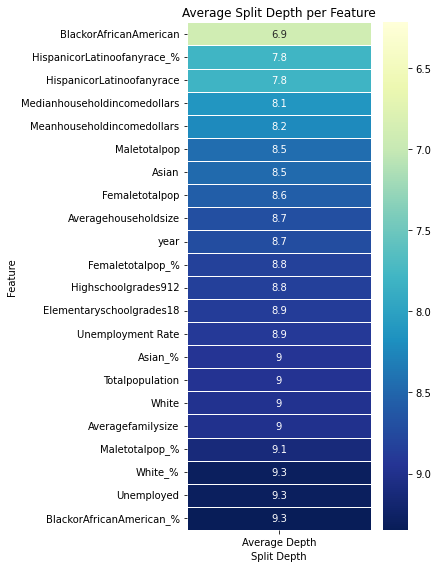

In [32]:
# Get min and max values
vmin = avg_depth_df['Average Depth'].max()
vmax = avg_depth_df['Average Depth'].min()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 8))
heatmap = sns.heatmap(
    avg_depth_df,
    annot=True,
    cmap='YlGnBu',
    vmin=vmin,
    vmax=vmax,
    cbar=True,
    linewidths=0.5,
    ax=ax
)

# Invert the colorbar axis
colorbar = heatmap.collections[0].colorbar
colorbar.ax.invert_yaxis()  # 🔄 this line fixes the issue

# Labels
ax.set_title("Average Split Depth per Feature")
ax.set_ylabel("Feature")
ax.set_xlabel("Split Depth")
plt.tight_layout()
plt.savefig("featuresplitdepth_final.png")
plt.show()

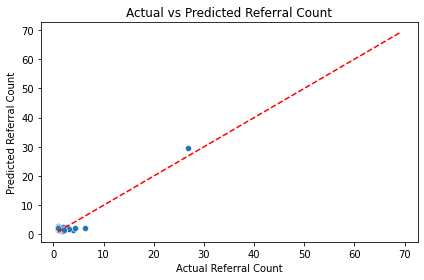

In [33]:
# Scatter plot of actual vs predicted referral counts
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Referral Count')
plt.ylabel('Predicted Referral Count')
plt.title('Actual vs Predicted Referral Count')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Line of perfect prediction
plt.tight_layout()
plt.show()

In [34]:
# Compute the correlation matrix using only numeric columns
corr = census_referrals.select_dtypes(include='number').corr()

# Focus on correlations with 'referral_count'
ref_corr = corr['referral_count'].drop('referral_count').sort_values(ascending=False)
ref_corr

Asian                           0.937130
HispanicorLatinoofanyrace       0.922241
BlackorAfricanAmerican          0.901235
Femaletotalpop                  0.872889
Civilianlaborforce              0.866595
Totalhouseholds                 0.866406
Totalpopulation                 0.865082
Maletotalpop                    0.863087
White                           0.858741
Highschoolgrades912             0.855635
Elementaryschoolgrades18        0.846059
Unemployed                      0.746099
Meanhouseholdincomedollars      0.091190
Averagehouseholdsize            0.089271
Maletotalpop_%                  0.086761
Medianhouseholdincomedollars    0.062155
Asian_%                         0.051795
year                            0.041710
Averagefamilysize               0.037889
BlackorAfricanAmerican_%        0.018149
Femaletotalpop_%                0.002685
White_%                        -0.027572
HispanicorLatinoofanyrace_%    -0.027813
Unemployment Rate              -0.039219
Name: referral_c

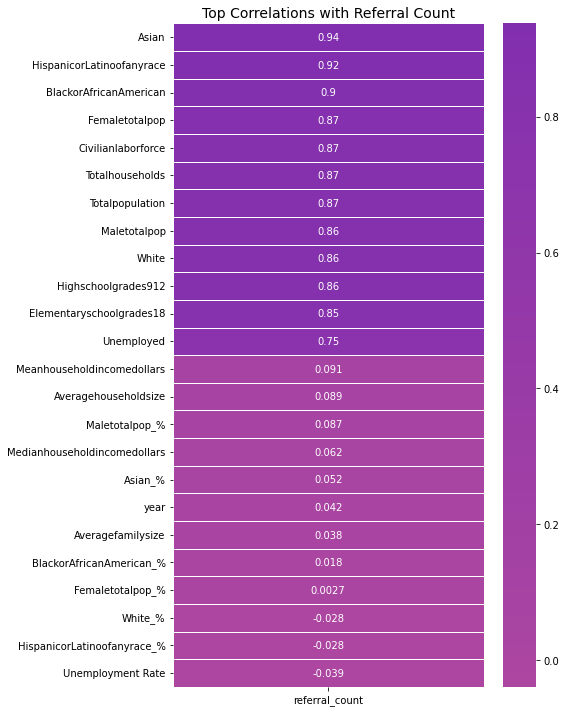

In [35]:
# Convert to DataFrame for visualization
ref_corr_df = ref_corr.to_frame()

lavender_cmap = LinearSegmentedColormap.from_list("lavender_map", ["#ac46a1", "#973aa8", "#822faf"])

# Plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(ref_corr_df, annot=True, cmap=lavender_cmap, linewidths=0.5, cbar=True)
plt.title("Top Correlations with Referral Count", fontsize=14)
plt.tight_layout()
#plt.savefig("heatmap.png")
plt.show()

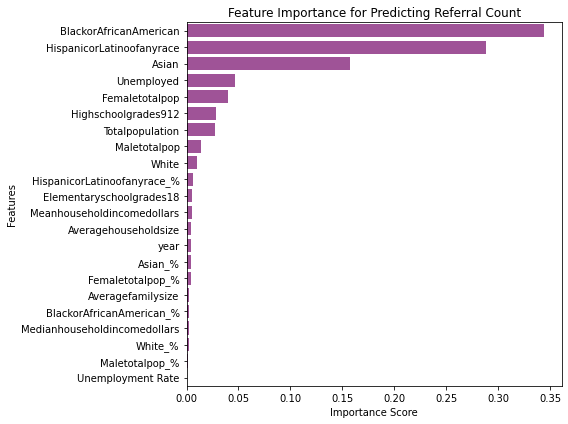

In [36]:
# Create a DataFrame for better plotting with seaborn
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance and plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False), color='#ac46a1')
plt.title('Feature Importance for Predicting Referral Count')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig("feature_imp_final.png")
plt.show()

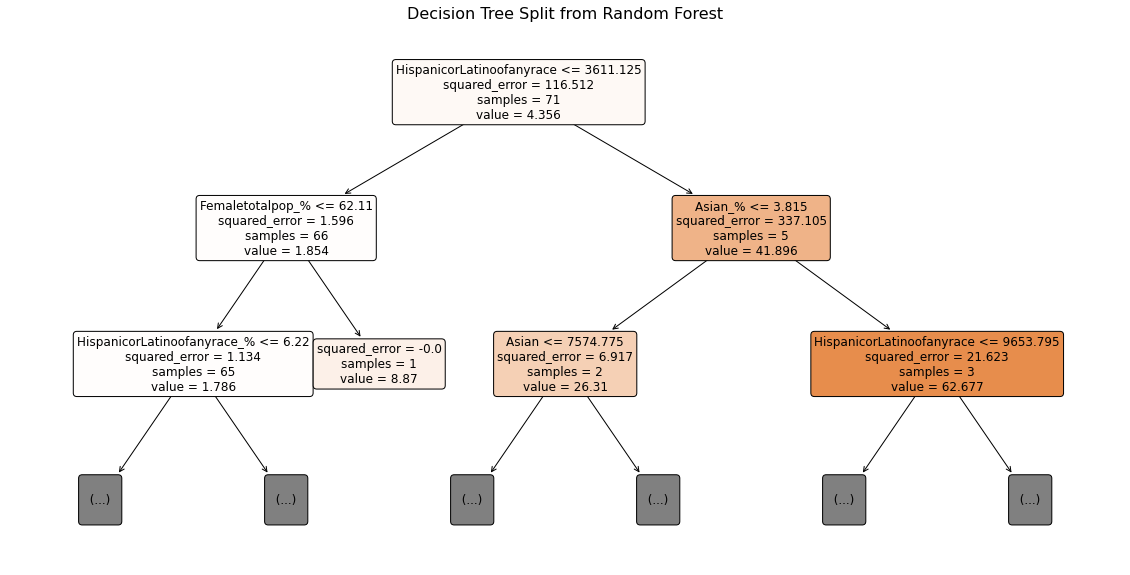

In [37]:
# Pick one tree from the forest (e.g., the first one)
tree = rf.estimators_[0]

# Plot the first few levels of that tree
plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=feature_cols,
    filled=True,
    rounded=True,
    max_depth=2,        # Visualize just the top 3 levels
    fontsize=12,
)
plt.title("Decision Tree Split from Random Forest", fontsize=16)
plt.savefig("decision_tree.png")
plt.show()